## Рекомендательные системы - 2

В этом задании будем практиковаться в реализации рекомендательных систем.

Воспользуемся небольшим датасетом с Kaggle: [Articles Sharing and Reading from CI&T Deskdrop](https://www.kaggle.com/gspmoreira/articles-sharing-reading-from-cit-deskdrop).

In [2]:
%pylab inline

import numpy as np
import pandas as pd

from tqdm import tqdm_notebook

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 0. Загрузка данных

Загрузим Deskdrop dataset, включающийся в себе логи за 1 год платформы, где пользователи читают статьи.

Данные включают в себя 2 файла:  
- **shared_articles.csv**
- **users_interactions.csv**

Как можно догадаться, в одном описания самих статей (нам понадобятся в контентных моделях), а в другом логи пользователей.

**Но сначала разберемся с удобным для дальнейших участий и просто скачивания данных инструментом, а именно api kaggle**

0. Скачиваем kaggle

In [ ]:
! pip install --user kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1. Переходим сюда в ваш аккаунт kaggle и там же ищем вкладку account
2. Ищем вот такое место внизу этой вкладки: 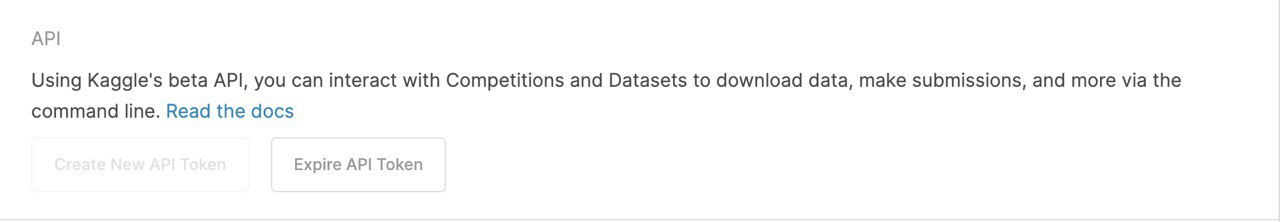 
И тут нажимаем create new api token

3. У вас скачивается файл с названием kaggle.json (обратите внимание чтобы было именно такое название, без (1) и т.д.)

4. Запускаем ниже код и выбираем вставить ваш скачанный json

In [ ]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))
  
# !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


5. Проверяем, что все работает, например, можем посмотреть какие соревнования на kaggle есть

In [2]:
! /Users/aarysmyatova/.local/bin/kaggle competitions list

ref                                                                              deadline             category            reward  teamCount  userHasEntered  
-------------------------------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
https://www.kaggle.com/competitions/llm-prompt-recovery                          2024-04-16 23:59:00  Featured          $200,000        748           False  
https://www.kaggle.com/competitions/pii-detection-removal-from-educational-data  2024-04-23 23:59:00  Featured           $60,000       1376           False  
https://www.kaggle.com/competitions/hms-harmful-brain-activity-classification    2024-04-08 23:59:00  Research           $50,000       2192           False  
https://www.kaggle.com/competitions/march-machine-learning-mania-2024            2024-04-10 23:59:00  Featured           $50,000        301           False  
https://www.kaggle.com/competitions/data-assistants-

Ура! Теперь мы научились этим пользоваться. Также через этот инстумент можно кидать submit файлы на скор, скачивать данные без посредников. Сейчас попробуем так сделать и скачаем данные для нашей домашней работы без хитрых выкачиваний на диски или (не дай бог) на локальную машину https://www.kaggle.com/docs/api

In [ ]:
! kaggle datasets download -d gspmoreira/articles-sharing-reading-from-cit-deskdrop

 61% 5.00M/8.20M [00:00<00:00, 38.6MB/s]
100% 8.20M/8.20M [00:00<00:00, 53.8MB/s]


In [ ]:
! unzip articles-sharing-reading-from-cit-deskdrop.zip

Archive:  articles-sharing-reading-from-cit-deskdrop.zip
  inflating: shared_articles.csv     
  inflating: users_interactions.csv  


**Ура, мы можем работать!**

In [6]:
!brew install sox ffmpeg libcairo2 libcairo2-dev
!brew install texlive-full

Running `brew update --auto-update`...
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
actions-batch              ignite                     pawk
appwrite                   kin                        phodav
asmfmt                     ktfmt                      pkl
autobrr                    kubeshark                  podman-tui
bluez                      kubetui                    prjtrellis
bpftop                     liborigin                  proto
cargo-fuzz                 libsql                     rawdog
cekit                      lsusb-laniksj              robin-map
cmake-language-server      magic-wormhole.rs          scala@3.3
deadfinder                 mariadb@11.2               seam
dhall-toml                 mdsh                       sigi
dotslash                   mlx                        sqlboiler
edbrowse                   mmdbinspect                ssh3
edgevpn                    moon                       sshpass
envio  

In [3]:
!pip3 -q install cython
!pip3 -q install git+https://github.com/coreylynch/pyFM
!pip3 -q install catboost

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [76 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-11.1-arm64-cpython-311
      creating build/lib.macosx-11.1-arm64-cpython-311/pyfm
      copying pyfm/pylibfm.py -> build/lib.macosx-11.1-arm64-cpython-311/pyfm
      copying pyfm/__init__.py -> build/lib.macosx-11.1-arm64-cpython-311/pyfm
      running build_ext
      Compiling pyfm_fast.pyx because it changed.
      [1/1] Cythonizing pyfm_fast.pyx
      /Users/aarysmyatova/miniconda3/lib/python3.11/site-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /private/var/folders/s3/ydbs3hzj3kj1ybtxdgpw1q4w0000gn/T/pip-req-build-9gibycxg/pyfm_fast.pyx
        tree = Parsing.p_module(s, pxd, full_module_name)
    

Мы загрузили Deskdrop dataset, включающийся в себе логи за 1 год платформы, где пользователи читают статьи.

Данные включают в себя 2 файла:  
- **shared_articles.csv**
- **users_interactions.csv**

Как можно догадаться, в одном описания самих статей (нам понадобятся в контентных моделях), а в другом логи пользователей.

#### shared_articles.csv

Так как в файле перечислены даже удалённые статьи, то мы их сразу удалим (на самом деле они могли бы быть нам полезны для подсчёта различных величин, хоть мы и не можем их рекомендовать).

In [52]:
articles_df = pd.read_csv('shared_articles.csv')
articles_df = articles_df[articles_df['eventType'] == 'CONTENT SHARED']
articles_df.head(2)

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en


#### users_interactions.csv

В колонке eventType описаны действия, которые могли совершать пользователи над статьёй:  
- VIEW
- LIKE
- COMMENT CREATED
- FOLLOW
- BOOKMARK

In [53]:
interactions_df = pd.read_csv('users_interactions.csv')
interactions_df.head(10)

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN
5,1465413742,VIEW,310515487419366995,-8763398617720485024,1395789369402380392,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,MG,BR
6,1465415950,VIEW,-8864073373672512525,3609194402293569455,1143207167886864524,NaN,NaN,NaN
7,1465415066,VIEW,-1492913151930215984,4254153380739593270,8743229464706506141,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR
8,1465413762,VIEW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
9,1465413771,VIEW,3064370296170038610,3609194402293569455,1143207167886864524,NaN,NaN,NaN


In [54]:
interactions_df.personId = interactions_df.personId.astype(str)
interactions_df.contentId = interactions_df.contentId.astype(str)
articles_df.contentId = articles_df.contentId.astype(str)

### Предобработка данных

В логах встречаются различные действия пользователей. Однако мы хотим работать лишь с одной величиной, характеризующей всё взаимодействие пользователя со статьёй. Предлагается задать действиям следующие веса:

In [55]:
event_type_strength = {
   'VIEW': 1.0,
   'LIKE': 2.0, 
   'BOOKMARK': 2.5, 
   'FOLLOW': 3.0,
   'COMMENT CREATED': 4.0,  
}

Посчитаем числовую величину "оценки" пользователем статьи с указанными выше весами.

In [56]:
interactions_df['eventStrength'] = interactions_df.eventType.apply(lambda x: event_type_strength[x])
interactions_df['eventStrength']

0        1.0
1        1.0
2        1.0
3        3.0
4        1.0
        ... 
72307    2.0
72308    1.0
72309    1.0
72310    1.0
72311    1.0
Name: eventStrength, Length: 72312, dtype: float64

Ремендательные системы подвержены проблеме холодного старта. Будем работать только с теми пользователями, которые взаимодействовали хотя бы с 5-ю материалами.

Оставим только таких пользователей.

In [57]:
users_interactions_count_df = (
    interactions_df
    .groupby(['personId', 'contentId'])
    .first()
    .reset_index()
    .groupby('personId').size())
print('# users:', len(users_interactions_count_df))

users_with_enough_interactions_df = \
    users_interactions_count_df[users_interactions_count_df >= 5].reset_index()[['personId']]
print('# users with at least 5 interactions:',len(users_with_enough_interactions_df))

# users: 1895
# users with at least 5 interactions: 1140


<Axes: >

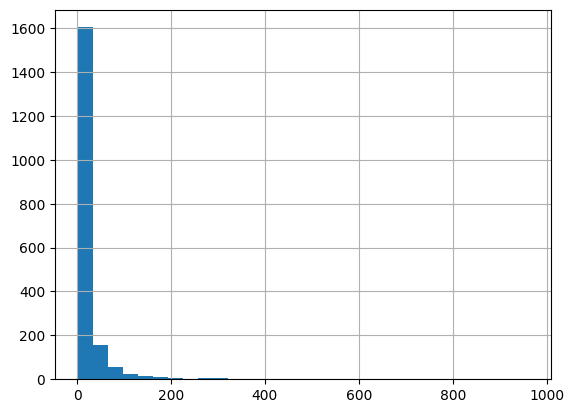

In [58]:
users_interactions_count_df.hist(bins=30)

Оставим только те взаимодействия, которые касаются только отфильтрованных пользователей.

In [59]:
interactions_from_selected_users_df = interactions_df.loc[np.in1d(interactions_df.personId,
            users_with_enough_interactions_df)]

In [60]:
print('# interactions before:', interactions_df.shape)
print('# interactions after:', interactions_from_selected_users_df.shape)

# interactions before: (72312, 9)
# interactions after: (69868, 9)


В данной постановке каждый пользователей мог взаимодействовать с каждой статьёй более 1 раза (как минимум совершая различные действия). Предлагается "схлопнуть" все действия в одно взаимодействие с весом, равным сумме весов. 

Однако полученное число будет в том числе тем больше, чем больше действий произвёл человек. Чтобы уменьшить разброс предлагается взять логарифм от полученного числа (можно придумывать другие веса действиям и по-другому обрабатывать значения).

Также сохраним последнее значение времени взаимодействия для разделениея выборки на обучение и контроль.

In [61]:
import math
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = (
    interactions_from_selected_users_df
    .groupby(['personId', 'contentId']).eventStrength.sum()
    .apply(smooth_user_preference)
    .reset_index().set_index(['personId', 'contentId'])
)
interactions_full_df['last_timestamp'] = (
    interactions_from_selected_users_df
    .groupby(['personId', 'contentId'])['timestamp'].last()
)
        
interactions_full_df = interactions_full_df.reset_index()
interactions_full_df.head(20)

,personId,contentId,eventStrength,last_timestamp
0,-1007001694607905623,-5065077552540450930,1.000000,1470395911
1,-1007001694607905623,-6623581327558800021,1.000000,1487240080
2,-1007001694607905623,-793729620925729327,1.000000,1472834892
3,-1007001694607905623,1469580151036142903,1.000000,1487240062
4,-1007001694607905623,7270966256391553686,1.584963,1485994324
5,-1007001694607905623,8729086959762650511,1.000000,1487240086
6,-1032019229384696495,-1006791494035379303,1.000000,1469129122
7,-1032019229384696495,-1039912738963181810,1.000000,1459376415
8,-1032019229384696495,-1081723567492738167,2.000000,1464054093
9,-1032019229384696495,-1111518890369033396,1.000000,1470109122


Разобьём выборку на обучение и контроль по времени.

In [62]:
from sklearn.model_selection import train_test_split

split_ts = 1475519530
interactions_train_df = interactions_full_df.loc[interactions_full_df.last_timestamp < split_ts].copy()
interactions_test_df = interactions_full_df.loc[interactions_full_df.last_timestamp >= split_ts].copy()

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

interactions_train_df

# interactions on Train set: 29329
# interactions on Test set: 9777


,personId,contentId,eventStrength,last_timestamp
0,-1007001694607905623,-5065077552540450930,1.0,1470395911
2,-1007001694607905623,-793729620925729327,1.0,1472834892
6,-1032019229384696495,-1006791494035379303,1.0,1469129122
7,-1032019229384696495,-1039912738963181810,1.0,1459376415
8,-1032019229384696495,-1081723567492738167,2.0,1464054093
...,...,...,...,...
39099,997469202936578234,9112765177685685246,2.0,1472479493
39100,998688566268269815,-1255189867397298842,1.0,1474567164
39101,998688566268269815,-401664538366009049,1.0,1474567449
39103,998688566268269815,6881796783400625893,1.0,1474567675


Также разбить данные можно не опираясь на временной фактор:
```python
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['personId'], 
                                   test_size=0.25,
                                   random_state=42)

```
Как повлият такое разбиение на итоговый результат?

Для удобства подсчёта качества запишем данные в формате, где строка соответствует пользователю, а столбцы будут истинными метками и предсказаниями в виде списков.

In [63]:
interactions = (
    interactions_train_df
    .groupby('personId')['contentId'].agg(lambda x: list(x))
    .reset_index()
    .rename(columns={'contentId': 'true_train'})
    .set_index('personId')
)

interactions['true_test'] = (
    interactions_test_df
    .groupby('personId')['contentId'].agg(lambda x: list(x))
)

# заполнение пропусков пустыми списками
interactions.loc[pd.isnull(interactions.true_test), 'true_test'] = [
    [''] for x in range(len(interactions.loc[pd.isnull(interactions.true_test), 'true_test']))]

interactions.head(5)

,true_train,true_test
personId,,
-1007001694607905623,"[-5065077552540450930, -793729620925729327]","[-6623581327558800021, 1469580151036142903, 72..."
-1032019229384696495,"[-1006791494035379303, -1039912738963181810, -...","[-1415040208471067980, -2555801390963402198, -..."
-108842214936804958,"[-1196068832249300490, -133139342397538859, -1...","[-2780168264183400543, -3060116862184714437, -..."
-1130272294246983140,"[-1150591229250318592, -1196068832249300490, -...","[-1606980109000976010, -1663441888197894674, -..."
-1160159014793528221,"[-133139342397538859, -387651900461462767, 377...",[-3462051751080362224]


Настало время оценить качество. Посчитаем precision@10 для каждого пользователя (доля угаданных рекомендаций). Усредним по всем пользователям. Везде далее будем считать эту же метрику.

In [64]:
def calc_precision(column):
    ####### Здесь ваш код ##########
    return (
        interactions
        .apply(
            lambda row:
            len(set(row['true_test']).intersection(
                set(row[column]))) /
            min(len(row['true_test']) + 0.001, 10.0),
            axis=1)).mean()

    ################################

Cоставим матрицу "оценок" пользователей. Нули будут обозначать отсутствие взаимодействия.

In [65]:
ratings = pd.pivot_table(
    interactions_train_df,
    values='eventStrength',
    index='personId',
    columns='contentId').fillna(0)

## Часть 3. Контентные  модели

В этой части реализуем альтернативный подход к рекомендательным системам — контентные модели.

Теперь мы будем оперировать не матрицей с оценками, а классической для машинного обучения матрицей объекты-признаки. Каждый объект будет характеризовать пару user-item и содержать признаки, описывающие как пользователя, так и товар. Кроме этого признаки могут описывать и саму пару целиком.

Матрица со всеми взаимодействиями уже получена нами на этапа разбиения выборки на 2 части. 

Будем обучать классификатор на взаимодействие, а для него нужны отрицательные примеры. Добавим случайные отсутствующие взаимодействия как отрицательные.

Заметим, что модель оценивает каждую пару потенциального взаимодействия, а значит, надо подготовить выборку из всех возможных пар из пользователей и статей.

In [66]:
test_personId = np.repeat(interactions.index, len(ratings.columns)) 
test_contentId = list(ratings.columns) * len(interactions)
test = pd.DataFrame(
    np.array([test_personId, test_contentId]).T,
    columns=['personId', 'contentId'])

interactions_train_df = pd.concat((
    interactions_train_df,
    test.loc[
        np.random.permutation(test.index)[
            :4*len(interactions_train_df)]]), ignore_index=True)
interactions_train_df.eventStrength.fillna(0, inplace=True)

Придумаем и добавим признаков о пользователях и статьях. Сначала добавим информацию о статьях в данные о взаимодействиях.

In [67]:
articles_df

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en
5,1459194522,CONTENT SHARED,-2826566343807132236,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.coindesk.com/ieee-blockchain-oxford...,IEEE to Talk Blockchain at Cloud Computing Oxf...,One of the largest and oldest organizations fo...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,1487946604,CONTENT SHARED,9213260650272029784,3609194402293569455,7144190892417579456,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,SP,BR,HTML,https://startupi.com.br/2017/02/liga-ventures-...,"Conheça a Liga IoT, plataforma de inovação abe...","A Liga Ventures, aceleradora de startups espec...",pt
3118,1487947067,CONTENT SHARED,-3295913657316686039,6960073744377754728,-8193630595542572738,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...,GA,US,HTML,https://thenextweb.com/apps/2017/02/14/amazon-...,Amazon takes on Skype and GoToMeeting with its...,"Amazon has launched Chime, a video conferencin...",en
3119,1488223224,CONTENT SHARED,3618271604906293310,1908339160857512799,-183341653743161643,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_0...,SP,BR,HTML,https://code.org/about/2016,Code.org 2016 Annual Report,"February 9, 2017 - We begin each year with a l...",en
3120,1488300719,CONTENT SHARED,6607431762270322325,-1393866732742189886,2367029511384577082,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,MG,BR,HTML,https://www.bloomberg.com/news/articles/2017-0...,JPMorgan Software Does in Seconds What Took La...,"At JPMorgan Chase & Co., a learning machine is...",en


In [68]:
interactions_train_df = interactions_train_df.merge(articles_df, how='left', on='contentId')
interactions_test_df = interactions_test_df.merge(articles_df, how='left', on='contentId')

In [69]:
interactions_train_df

,personId,contentId,eventStrength,last_timestamp,timestamp,eventType,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,-1007001694607905623,-5065077552540450930,1.0,1.470396e+09,1.470348e+09,CONTENT SHARED,2.542290e+18,-1.265450e+18,NaN,NaN,NaN,HTML,http://www.sonhoseguro.com.br/2016/08/ranking-...,Ranking das maiores seguradoras da Europa - 20...,A AXA se manteve na liderança do ranking de ma...,pt
1,-1007001694607905623,-793729620925729327,1.0,1.472835e+09,1.472759e+09,CONTENT SHARED,-5.345499e+17,-9.017476e+18,NaN,NaN,NaN,HTML,https://developers.googleblog.com/2016/08/clos...,Closure Compiler in JavaScript,"Posted by Sam Thorogood , Developer Programs E...",en
2,-1032019229384696495,-1006791494035379303,1.0,1.469129e+09,1.469129e+09,CONTENT SHARED,-1.032019e+18,7.296905e+17,NaN,NaN,NaN,HTML,https://techcrunch.com/2016/07/20/google-unlea...,Google unleashes DeepMind on energy-hungry dat...,DeepMind may be a master at one of the most co...,en
3,-1032019229384696495,-1039912738963181810,1.0,1.459376e+09,1.459374e+09,CONTENT SHARED,-7.092877e+17,-8.526179e+18,NaN,NaN,NaN,HTML,http://9to5mac.com/2016/03/30/apple-launches-s...,"Apple launches Safari Technology Preview, a br...","Apple today announced a new browser, sort of. ...",en
4,-1032019229384696495,-1081723567492738167,2.0,1.464054e+09,1.464054e+09,CONTENT SHARED,-1.443637e+18,2.359075e+18,NaN,NaN,NaN,HTML,http://www.popsci.com/magenta-is-googles-proje...,'Magenta' Is Google's New Project To Make Art ...,If Google's artificial intelligence can paint ...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146640,-8099670049200803627,7612428320594238723,0.0,NaN,1.470676e+09,CONTENT SHARED,3.891638e+18,1.143023e+18,NaN,NaN,NaN,HTML,https://drupalize.me/blog/201607/why-learning-...,Why Is Learning Drupal Hard?,I'm super excited to be invited to be a keynot...,en
146641,5226673542598775232,-973131232603202326,0.0,NaN,1.460121e+09,CONTENT SHARED,-6.316613e+18,5.673696e+18,NaN,NaN,NaN,HTML,http://hollandfintech.com/infographic-dutch-fi...,Infographic Dutch Fintech Scene - HollandFinte...,Infographic Dutch Fintech Scene Holland FinTec...,en
146642,3617923130431400422,6094778865705471594,0.0,NaN,1.470224e+09,CONTENT SHARED,1.895326e+18,2.406098e+18,NaN,NaN,NaN,HTML,http://www.mobiletime.com.br/02/08/2016/santan...,MOBILE TIME - Santander lança app dedicado aos...,Santander lança app dedicado aos clientes do e...,pt
146643,-7574071014482881124,6230272013326185698,0.0,NaN,1.465879e+09,CONTENT SHARED,3.609194e+18,-1.068131e+18,NaN,NaN,NaN,HTML,http://startupi.com.br/2016/06/evento-em-sao-p...,Evento em São Paulo traz grandes players do me...,No dia 24 de agosto será realizada a segunda e...,pt


In [70]:
# first feature index
features_start = len(interactions_train_df.columns)

In [71]:
features_start

16

После обучения модели нам придётся делать предсказания на тестовой выборке для всех возможных пар статья-пользователь. Подготовим такую матрицу, чтобы параллельно посчитать признаки для неё.

In [72]:
test_personId = np.repeat(interactions.index, len(articles_df)) 
test_contentId = list(articles_df.contentId) * len(interactions)
test = pd.DataFrame(
    np.array([test_personId, test_contentId]).T,
    columns=['personId', 'contentId'])
test = test.merge(articles_df, how='left', on='contentId')

test.head()

,personId,contentId,timestamp,eventType,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,-1007001694607905623,-4110354420726924665,1459193988,CONTENT SHARED,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,-1007001694607905623,-7292285110016212249,1459194146,CONTENT SHARED,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
2,-1007001694607905623,-6151852268067518688,1459194474,CONTENT SHARED,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
3,-1007001694607905623,2448026894306402386,1459194497,CONTENT SHARED,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en
4,-1007001694607905623,-2826566343807132236,1459194522,CONTENT SHARED,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.coindesk.com/ieee-blockchain-oxford...,IEEE to Talk Blockchain at Cloud Computing Oxf...,One of the largest and oldest organizations fo...,en


Добавим признаки-индикаторы возможных значений contentType.

In [73]:
interactions_train_df['is_HTML'] = interactions_train_df.contentType == 'HTML'
interactions_train_df['is_RICH'] = interactions_train_df.contentType == 'RICH'
interactions_train_df['is_VIDEO'] = interactions_train_df.contentType == 'VIDEO'

test['is_HTML'] = test.contentType == 'HTML'
test['is_RICH'] = test.contentType == 'RICH'
test['is_VIDEO'] = test.contentType == 'VIDEO'

Добавим признаки "длина названия" и "длина текста" + некоторые проверки на ключевые слова.

In [74]:
interactions_train_df['title_length'] = interactions_train_df.title.fillna('').apply(len)
interactions_train_df['text_length'] = interactions_train_df.text.fillna('').apply(len)

test['title_length'] = test.title.fillna('').apply(len)
test['text_length'] = test.text.fillna('').apply(len)

interactions_train_df['has_new'] = \
    interactions_train_df.title.fillna('').apply(lambda x: 'new' in x.lower())
interactions_train_df['has_why'] = \
    interactions_train_df.title.fillna('').apply(lambda x: 'why' in x.lower())
interactions_train_df['has_how'] = \
    interactions_train_df.title.fillna('').apply(lambda x: 'how' in x.lower())
interactions_train_df['has_ai'] = \
    interactions_train_df.title.fillna('').apply(lambda x: 'ai' in x.lower())

test['has_new'] = \
    test.title.fillna('').apply(lambda x: 'new' in x.lower())
test['has_why'] = \
    test.title.fillna('').apply(lambda x: 'why' in x.lower())
test['has_how'] = \
    test.title.fillna('').apply(lambda x: 'how' in x.lower())
test['has_ai'] = \
    test.title.fillna('').apply(lambda x: 'ai' in x.lower())

Добавим признаки-индикаторы языка.

In [75]:
interactions_train_df['is_lang_en'] = interactions_train_df.lang == 'en'
interactions_train_df['is_lang_pt'] = interactions_train_df.lang == 'pt'

test['is_lang_en'] = test.lang == 'en'
test['is_lang_pt'] = test.lang == 'pt'

In [77]:
interactions_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146645 entries, 0 to 146644
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   personId         146645 non-null  object 
 1   contentId        146645 non-null  object 
 2   eventStrength    146645 non-null  float64
 3   last_timestamp   29329 non-null   float64
 4   timestamp        146220 non-null  float64
 5   eventType        146220 non-null  object 
 6   authorPersonId   146220 non-null  float64
 7   authorSessionId  146220 non-null  float64
 8   authorUserAgent  3224 non-null    object 
 9   authorRegion     3224 non-null    object 
 10  authorCountry    3224 non-null    object 
 11  contentType      146220 non-null  object 
 12  url              146220 non-null  object 
 13  title            146220 non-null  object 
 14  text             146220 non-null  object 
 15  lang             146220 non-null  object 
 16  is_HTML          146645 non-null  bool

Обучим на полученных признаках градиентный бустинг.

In [81]:
interactions_train_df[interactions_train_df.columns[features_start:]]

,is_HTML,is_RICH,is_VIDEO,title_length,text_length,has_new,has_why,has_how,has_ai,is_lang_en,is_lang_pt
0,True,False,False,63,655,False,False,False,True,False,True
1,True,False,False,30,2495,False,False,False,False,True,False
2,True,False,False,89,1221,False,False,False,False,True,False
3,True,False,False,102,801,False,False,False,False,True,False
4,True,False,False,74,1860,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
146640,True,False,False,28,9802,False,True,False,False,True,False
146641,True,False,False,52,1021,False,False,False,False,True,False
146642,True,False,False,74,653,False,False,False,False,False,True
146643,True,False,False,93,1955,False,False,False,False,False,True


In [78]:
import catboost 

model = catboost.CatBoostClassifier()
model.fit(interactions_train_df[interactions_train_df.columns[features_start:]],
          np.array(interactions_train_df.eventStrength > 0, dtype=int))

Learning rate set to 0.086682
0:	learn: 0.6577556	total: 18.2ms	remaining: 18.2s
1:	learn: 0.6286126	total: 26.8ms	remaining: 13.4s
2:	learn: 0.6050231	total: 33.3ms	remaining: 11.1s
3:	learn: 0.5853859	total: 42.1ms	remaining: 10.5s
4:	learn: 0.5694759	total: 49.5ms	remaining: 9.85s
5:	learn: 0.5565516	total: 56.2ms	remaining: 9.31s
6:	learn: 0.5460137	total: 61.6ms	remaining: 8.73s
7:	learn: 0.5373118	total: 67.8ms	remaining: 8.4s
8:	learn: 0.5299631	total: 74.8ms	remaining: 8.23s
9:	learn: 0.5239330	total: 82.1ms	remaining: 8.12s
10:	learn: 0.5188944	total: 89.2ms	remaining: 8.02s
11:	learn: 0.5148071	total: 96.2ms	remaining: 7.92s
12:	learn: 0.5110811	total: 104ms	remaining: 7.87s
13:	learn: 0.5081572	total: 111ms	remaining: 7.84s
14:	learn: 0.5057481	total: 120ms	remaining: 7.86s
15:	learn: 0.5035878	total: 128ms	remaining: 7.86s
16:	learn: 0.5017594	total: 136ms	remaining: 7.84s
17:	learn: 0.5005163	total: 141ms	remaining: 7.67s
18:	learn: 0.4992497	total: 148ms	remaining: 7.66s


175:	learn: 0.4757387	total: 1.62s	remaining: 7.59s
176:	learn: 0.4756745	total: 1.63s	remaining: 7.58s
177:	learn: 0.4755961	total: 1.64s	remaining: 7.58s
178:	learn: 0.4755668	total: 1.65s	remaining: 7.57s
179:	learn: 0.4755183	total: 1.66s	remaining: 7.56s
180:	learn: 0.4754723	total: 1.67s	remaining: 7.55s
181:	learn: 0.4754074	total: 1.68s	remaining: 7.54s
182:	learn: 0.4753041	total: 1.69s	remaining: 7.53s
183:	learn: 0.4752040	total: 1.7s	remaining: 7.52s
184:	learn: 0.4751821	total: 1.7s	remaining: 7.51s
185:	learn: 0.4750776	total: 1.71s	remaining: 7.5s
186:	learn: 0.4750203	total: 1.72s	remaining: 7.5s
187:	learn: 0.4749703	total: 1.73s	remaining: 7.49s
188:	learn: 0.4749239	total: 1.74s	remaining: 7.48s
189:	learn: 0.4748637	total: 1.75s	remaining: 7.47s
190:	learn: 0.4748071	total: 1.76s	remaining: 7.46s
191:	learn: 0.4746773	total: 1.77s	remaining: 7.46s
192:	learn: 0.4746173	total: 1.78s	remaining: 7.45s
193:	learn: 0.4745626	total: 1.79s	remaining: 7.44s
194:	learn: 0.47

350:	learn: 0.4655188	total: 3.25s	remaining: 6.01s
351:	learn: 0.4654988	total: 3.26s	remaining: 6s
352:	learn: 0.4654745	total: 3.27s	remaining: 5.99s
353:	learn: 0.4654069	total: 3.27s	remaining: 5.97s
354:	learn: 0.4653718	total: 3.28s	remaining: 5.96s
355:	learn: 0.4653246	total: 3.29s	remaining: 5.96s
356:	learn: 0.4652978	total: 3.3s	remaining: 5.94s
357:	learn: 0.4652325	total: 3.31s	remaining: 5.93s
358:	learn: 0.4651892	total: 3.32s	remaining: 5.92s
359:	learn: 0.4651344	total: 3.33s	remaining: 5.91s
360:	learn: 0.4650576	total: 3.33s	remaining: 5.9s
361:	learn: 0.4650224	total: 3.34s	remaining: 5.89s
362:	learn: 0.4649967	total: 3.35s	remaining: 5.88s
363:	learn: 0.4649304	total: 3.36s	remaining: 5.88s
364:	learn: 0.4648867	total: 3.37s	remaining: 5.87s
365:	learn: 0.4647859	total: 3.38s	remaining: 5.86s
366:	learn: 0.4647337	total: 3.39s	remaining: 5.85s
367:	learn: 0.4646801	total: 3.4s	remaining: 5.84s
368:	learn: 0.4646370	total: 3.41s	remaining: 5.83s
369:	learn: 0.4645

526:	learn: 0.4586805	total: 4.88s	remaining: 4.38s
527:	learn: 0.4586526	total: 4.89s	remaining: 4.37s
528:	learn: 0.4586104	total: 4.9s	remaining: 4.36s
529:	learn: 0.4585871	total: 4.91s	remaining: 4.35s
530:	learn: 0.4585353	total: 4.92s	remaining: 4.34s
531:	learn: 0.4585105	total: 4.92s	remaining: 4.33s
532:	learn: 0.4584971	total: 4.93s	remaining: 4.32s
533:	learn: 0.4584882	total: 4.94s	remaining: 4.31s
534:	learn: 0.4584353	total: 4.95s	remaining: 4.3s
535:	learn: 0.4583914	total: 4.96s	remaining: 4.29s
536:	learn: 0.4583568	total: 4.97s	remaining: 4.28s
537:	learn: 0.4583325	total: 4.98s	remaining: 4.27s
538:	learn: 0.4582951	total: 4.99s	remaining: 4.26s
539:	learn: 0.4582734	total: 5s	remaining: 4.25s
540:	learn: 0.4582494	total: 5.01s	remaining: 4.25s
541:	learn: 0.4582262	total: 5.01s	remaining: 4.24s
542:	learn: 0.4581880	total: 5.02s	remaining: 4.23s
543:	learn: 0.4581406	total: 5.03s	remaining: 4.22s
544:	learn: 0.4580854	total: 5.04s	remaining: 4.21s
545:	learn: 0.458

700:	learn: 0.4538845	total: 6.5s	remaining: 2.77s
701:	learn: 0.4538651	total: 6.5s	remaining: 2.76s
702:	learn: 0.4538518	total: 6.51s	remaining: 2.75s
703:	learn: 0.4538439	total: 6.52s	remaining: 2.74s
704:	learn: 0.4538119	total: 6.53s	remaining: 2.73s
705:	learn: 0.4537764	total: 6.54s	remaining: 2.72s
706:	learn: 0.4537436	total: 6.55s	remaining: 2.71s
707:	learn: 0.4537228	total: 6.56s	remaining: 2.71s
708:	learn: 0.4536510	total: 6.57s	remaining: 2.69s
709:	learn: 0.4536184	total: 6.58s	remaining: 2.69s
710:	learn: 0.4535993	total: 6.58s	remaining: 2.68s
711:	learn: 0.4535619	total: 6.59s	remaining: 2.67s
712:	learn: 0.4535547	total: 6.6s	remaining: 2.66s
713:	learn: 0.4535217	total: 6.61s	remaining: 2.65s
714:	learn: 0.4535121	total: 6.62s	remaining: 2.64s
715:	learn: 0.4534961	total: 6.63s	remaining: 2.63s
716:	learn: 0.4534738	total: 6.64s	remaining: 2.62s
717:	learn: 0.4534545	total: 6.65s	remaining: 2.61s
718:	learn: 0.4534331	total: 6.66s	remaining: 2.6s
719:	learn: 0.45

872:	learn: 0.4501904	total: 8.13s	remaining: 1.18s
873:	learn: 0.4501685	total: 8.14s	remaining: 1.17s
874:	learn: 0.4501578	total: 8.15s	remaining: 1.16s
875:	learn: 0.4501481	total: 8.16s	remaining: 1.16s
876:	learn: 0.4501360	total: 8.17s	remaining: 1.15s
877:	learn: 0.4501304	total: 8.18s	remaining: 1.14s
878:	learn: 0.4501125	total: 8.19s	remaining: 1.13s
879:	learn: 0.4501019	total: 8.2s	remaining: 1.12s
880:	learn: 0.4500907	total: 8.21s	remaining: 1.11s
881:	learn: 0.4500593	total: 8.22s	remaining: 1.1s
882:	learn: 0.4500428	total: 8.23s	remaining: 1.09s
883:	learn: 0.4500216	total: 8.24s	remaining: 1.08s
884:	learn: 0.4500071	total: 8.25s	remaining: 1.07s
885:	learn: 0.4499974	total: 8.25s	remaining: 1.06s
886:	learn: 0.4499867	total: 8.26s	remaining: 1.05s
887:	learn: 0.4499747	total: 8.27s	remaining: 1.04s
888:	learn: 0.4499549	total: 8.28s	remaining: 1.03s
889:	learn: 0.4499495	total: 8.29s	remaining: 1.02s
890:	learn: 0.4499350	total: 8.3s	remaining: 1.01s
891:	learn: 0.4

Сделаем предсказания на тестовой выборке, сформируем из них рекомендации. 

In [79]:
top_k = 10

predictions = model.predict_proba(test[interactions_train_df.columns[features_start:]])[:, 1]
test['predictions'] = predictions

test = test.sort_values('predictions', ascending=False)
predictions = test.groupby('personId')['contentId'].aggregate(list)
tmp_predictions = []

for personId in tqdm_notebook(interactions.index):
    prediction = np.array(predictions.loc[personId])
    
    tmp_predictions.append(
        list(prediction[~np.in1d(
            prediction,
            interactions.loc[personId, 'true_train'])])[:top_k])
    
interactions['prediction_content'] = tmp_predictions

/var/folders/s3/ydbs3hzj3kj1ybtxdgpw1q4w0000gn/T/ipykernel_21211/57618708.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for personId in tqdm_notebook(interactions.index):


  0%|          | 0/1112 [00:00<?, ?it/s]

Оценим их качество.

In [80]:
calc_precision('prediction_content')

0.008236649986211738

## Часть 4. Факторизационная машина

Вспомним, что факторизационная машина учитывает попарные взаимодействия признаков, что приводит сразу и к использованию контента (сами признаки), и к обучению скрытых представлений (индикаторы пользователей и статей).

Попробуем факторизационные машины из библиотеки pyFM (так как можно работать прямо из питона). https://github.com/coreylynch/pyFM

In [ ]:
!pip install cython==0.29.37
!pip install git+https://github.com/coreylynch/pyFM

In [82]:
from pyfm import pylibfm
from sklearn.feature_extraction import DictVectorizer

Перейдём к обобщению матричных разложений — факторизационным машинам, которые могут работать с контентной информацией. Вспомним, какие данные у нас изначально были:

В факторизационную машину можно загрузить "айдишники" пользователей и статей (то есть сделать аналог коллаборативной фильтрации) и одновременно различные признаки.

Удобно обрабатывать категориальные переменные (id и другие) можно с помощью DictVectorizer. Например, процесс может выглядеть вот так:
```python
train = [
    {"user": "1", "item": "5", "age": 19},
    {"user": "2", "item": "43", "age": 33},
    {"user": "3", "item": "20", "age": 55},
    {"user": "4", "item": "10", "age": 20},
]
v = DictVectorizer()
X = v.fit_transform(train)
y = np.repeat(1.0, X.shape[0])
fm = pylibfm.FM()
fm.fit(X,y)
fm.predict(v.transform({"user": "1", "item": "10", "age": 24}))
```

In [83]:
train = [
    {"user": "1", "item": "5", "age": 19},
    {"user": "2", "item": "43", "age": 33},
    {"user": "3", "item": "20", "age": 55},
    {"user": "4", "item": "10", "age": 20},
    {"user": "3", "item": "10", "age": 20}
]
v = DictVectorizer()
X = v.fit_transform(train)
y = np.repeat(1.0, X.shape[0])
fm = pylibfm.FM()
fm.fit(X,y)
fm.predict(v.transform({"user": "1", "item": "10", "age": 24}))

Creating validation dataset of 0.01 of training for adaptive regularization
-- Epoch 1
Training log loss: 0.21884


array([0.99102168])

In [84]:
v.transform({"user": "1", "item": "10", "age": 24})

<1x9 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [85]:
X.toarray()

array([[19.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.],
       [33.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
       [55.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.],
       [20.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [20.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [34]:
y

array([1., 1., 1., 1.])

Сгенерируем таблицу с признаками в таком виде, где будут id пользователя, статьи и автора статьи и несколько признаков, которые вы сможете придумать.

In [86]:
train_data = []

for i in tqdm_notebook(range(len(interactions_train_df))):
    features = {}
    features['personId'] = str(interactions_train_df.iloc[i].personId)
    features['contentId'] = str(interactions_train_df.iloc[i].contentId)

    try:
        article = articles_df.loc[features['contentId']]
        features['authorId'] = str(article.authorPersonId)
        features['authorCountry'] = str(article.authorCountry)
        features['lang'] = str(article.lang)
    except:
        features['authorId'] = 'unknown'
        features['authorCountry'] = 'unknown'
        features['lang'] = 'unknown'

    train_data.append(features)

/var/folders/s3/ydbs3hzj3kj1ybtxdgpw1q4w0000gn/T/ipykernel_21211/1161273873.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(interactions_train_df))):


  0%|          | 0/146645 [00:00<?, ?it/s]

In [87]:
train_data

[{'personId': '-1007001694607905623',
  'contentId': '-5065077552540450930',
  'authorId': 'unknown',
  'authorCountry': 'unknown',
  'lang': 'unknown'},
 {'personId': '-1007001694607905623',
  'contentId': '-793729620925729327',
  'authorId': 'unknown',
  'authorCountry': 'unknown',
  'lang': 'unknown'},
 {'personId': '-1032019229384696495',
  'contentId': '-1006791494035379303',
  'authorId': 'unknown',
  'authorCountry': 'unknown',
  'lang': 'unknown'},
 {'personId': '-1032019229384696495',
  'contentId': '-1039912738963181810',
  'authorId': 'unknown',
  'authorCountry': 'unknown',
  'lang': 'unknown'},
 {'personId': '-1032019229384696495',
  'contentId': '-1081723567492738167',
  'authorId': 'unknown',
  'authorCountry': 'unknown',
  'lang': 'unknown'},
 {'personId': '-1032019229384696495',
  'contentId': '-1111518890369033396',
  'authorId': 'unknown',
  'authorCountry': 'unknown',
  'lang': 'unknown'},
 {'personId': '-1032019229384696495',
  'contentId': '-1114438937697017987',


Повторим эту процедуру для тестовой выборки. Заметим, что модель оценивает каждую пару потенциального взаимодействия, а значит, надо подготовить выборку из всех возможных пар из пользователей и статей.

In [88]:
from copy import deepcopy

test_data = []

for i in tqdm_notebook(range(len(interactions))):
    features = {}
    features['personId'] = str(interactions.index[i])  
    for j in range(len(ratings.columns)):

        features['contentId'] = str(ratings.columns[j])
        
        try:
            article = articles_df.loc[features['contentId']]
            features['authorId'] = str(article.authorPersonId)
            features['authorCountry'] = str(article.authorCountry)
            features['lang'] = str(article.lang)
        except:
            features['authorId'] = 'unknown'
            features['authorCountry'] = 'unknown'
            features['lang'] = 'unknown'

        test_data.append(deepcopy(features))

/var/folders/s3/ydbs3hzj3kj1ybtxdgpw1q4w0000gn/T/ipykernel_21211/2989309265.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(interactions))):


  0%|          | 0/1112 [00:00<?, ?it/s]

Векторизуем, получим разреженные матрицы.

Мы будем обучать регрессор на силу взаимодействия, а для него нужны отрицательные примеры. Добавим некоторое количество случайных примеров как негативные (матрица взаимодействий разреженная, поэтому шансы взять как негативное взаимодействие некоторое положительное мало).

In [89]:
dv = DictVectorizer()

train_features = dv.fit_transform(
    train_data + list(np.random.permutation(test_data)[:100000]))
test_features = dv.transform(test_data)

In [90]:
dv.feature_names_

['authorCountry=unknown',
 'authorId=unknown',
 'contentId=-1006791494035379303',
 'contentId=-1021685224930603833',
 'contentId=-1022885988494278200',
 'contentId=-1024046541613287684',
 'contentId=-1033806831489252007',
 'contentId=-1038011342017850',
 'contentId=-1039912738963181810',
 'contentId=-1046621686880462790',
 'contentId=-1051830303851697653',
 'contentId=-1055630159212837930',
 'contentId=-1060990524105135617',
 'contentId=-1068603220639552685',
 'contentId=-1073835383506921412',
 'contentId=-1081723567492738167',
 'contentId=-1088742830039453732',
 'contentId=-1101832997669013246',
 'contentId=-1111518890369033396',
 'contentId=-1114438937697017987',
 'contentId=-1119244241345534741',
 'contentId=-1123543351704082417',
 'contentId=-1124738136890721085',
 'contentId=-1137602700803601559',
 'contentId=-1150591229250318592',
 'contentId=-1151034582628982912',
 'contentId=-1165347641456093580',
 'contentId=-1172724258904585136',
 'contentId=-1178371721262103855',
 'contentId

In [91]:
train_features

<246645x3481 sparse matrix of type '<class 'numpy.float64'>'
	with 1233225 stored elements in Compressed Sparse Row format>

In [92]:
y_train = list(interactions_train_df.eventStrength.values) + list(np.zeros(100000))

Укажем размером скрытого представления 10, сделаем 10 итераций.

In [93]:
fm = pylibfm.FM(num_factors=10, num_iter=30, task='regression')

fm.fit(train_features, y_train)

Creating validation dataset of 0.01 of training for adaptive regularization
-- Epoch 1
Training MSE: 0.11711
-- Epoch 2
Training MSE: 0.11225
-- Epoch 3
Training MSE: 0.11351
-- Epoch 4
Training MSE: 0.11283
-- Epoch 5
Training MSE: 0.11267
-- Epoch 6
Training MSE: 0.11265
-- Epoch 7
Training MSE: 0.11283
-- Epoch 8
Training MSE: 0.11291
-- Epoch 9
Training MSE: 0.11307
-- Epoch 10
Training MSE: 0.11304
-- Epoch 11
Training MSE: 0.11336
-- Epoch 12
Training MSE: 0.11334
-- Epoch 13
Training MSE: 0.11343
-- Epoch 14
Training MSE: 0.11331
-- Epoch 15
Training MSE: 0.11345
-- Epoch 16
Training MSE: 0.11340
-- Epoch 17
Training MSE: 0.11343
-- Epoch 18
Training MSE: 0.11359
-- Epoch 19
Training MSE: 0.11327
-- Epoch 20
Training MSE: 0.11342
-- Epoch 21
Training MSE: 0.11298
-- Epoch 22
Training MSE: 0.11321
-- Epoch 23
Training MSE: 0.11315
-- Epoch 24
Training MSE: 0.11339
-- Epoch 25
Training MSE: 0.11304
-- Epoch 26
Training MSE: 0.11315
-- Epoch 27
Training MSE: 0.11300
-- Epoch 28
Tra

Предскажем и оценим качество.

In [94]:
test_features = dv.transform(test_data)

y_predict = fm.predict(test_features)

new_ratings = y_predict.reshape((1112, 2366))

In [95]:
predictions = []

for i, person in enumerate(interactions.index):
    user_prediction = ratings.columns[np.argsort(new_ratings[i])[::-1]]
    predictions.append(
        user_prediction[~np.in1d(user_prediction,
                                 interactions.loc[person, 'true_train'])][:top_k])
    
interactions['fm_prediction'] = predictions

In [96]:
calc_precision('fm_prediction')

0.004250361345248577

## Бонуc: RankFM

Статьи:
* [Раз](https://d2l.ai/chapter_recommender-systems/ranking.html)
* [Два](https://towardsdatascience.com/factorization-machines-for-item-recommendation-with-implicit-feedback-data-5655a7c749db)

[GitHub c примером](https://github.com/etlundquist/rankfm/blob/master/examples/movielens.ipynb)